In [70]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [71]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [72]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
            "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [73]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

In [74]:
from masterplan_tools.method.balancing import MasterPlan

try:
    from rich import print
except:
    print("Install Rich package with `python -m pip install rich` for colored output")

In [75]:
city_model.services_graph.nodes[0]

{'population': 0.0,
 'is_living': False,
 'id': 0,
 'is_schools_service': 0,
 'provision_schools': 0,
 'id_schools': 0,
 'schools_capacity': 0,
 'is_kindergartens_service': 0,
 'provision_kindergartens': 0,
 'id_kindergartens': 0,
 'kindergartens_capacity': 0,
 'is_recreational_areas_service': 0,
 'provision_recreational_areas': 0,
 'id_recreational_areas': 0,
 'recreational_areas_capacity': 0,
 'is_hospitals_service': 0,
 'provision_hospitals': 0,
 'id_hospitals': 0,
 'hospitals_capacity': 0,
 'is_pharmacies_service': 0,
 'provision_pharmacies': 0,
 'id_pharmacies': 0,
 'pharmacies_capacity': 0,
 'is_policlinics_service': 0,
 'provision_policlinics': 0,
 'id_policlinics': 0,
 'policlinics_capacity': 0}

In [76]:
example_block = {
    "block_id": 2157,
    "area": 269.91357042657916,
    "current_living_area": 14.3349511,
    "current_industrial_area": 10.115001506,
    "current_population": 28909,
    "current_green_area": 24.4459,
    "floors": 5,
    "population_unprov_schools": 10,
    "population_unprov_kindergartens": 20,
    "population_unprov_recreational_areas": 30,
}

In [77]:
def example_to_result(example):
  return {
    'area': example['area'],
    'living_area': example['current_living_area'],
    # 'population': example['current_population'],
    'green_area': example['current_green_area'],
  }

In [78]:
before = example_to_result(example_block)

In [79]:
mp = MasterPlan(
    area=example_block["area"],
    current_living_area=example_block["current_living_area"],
    current_industrial_area=example_block["current_industrial_area"],
    current_population=example_block["current_population"],
    current_green_area=example_block["current_green_area"],
    current_unprov_schoolkids=example_block["population_unprov_schools"],
    current_unprov_kids=example_block["population_unprov_kindergartens"],
    current_unprov_green_population=example_block["population_unprov_recreational_areas"],
)

In [80]:
after = mp.optimal_solution_indicators()
print(after)

{
    'area': 269.91357042657916,
    'population': 54041,
    'b': 24.000000000000004,
    'green_coef_G': 9.0,
    'living_area': 74.65175110000001,
    'schools_area': 5.4,
    'schools_capacity': 3300.0,
    'kindergartens_area': 0,
    'kindergartens_capacity': 0,
    'green_area': 47.0917,
    'G_min_capacity': 78486.16666666667,
    'G_max_capacity': 39243.083333333336,
    'green_coef_G_capacity': 52324.11111111112,
    'op_area': 0.075396,
    'parking1_area': 18.999792000000003,
    'parking2_area': 18.47202
}

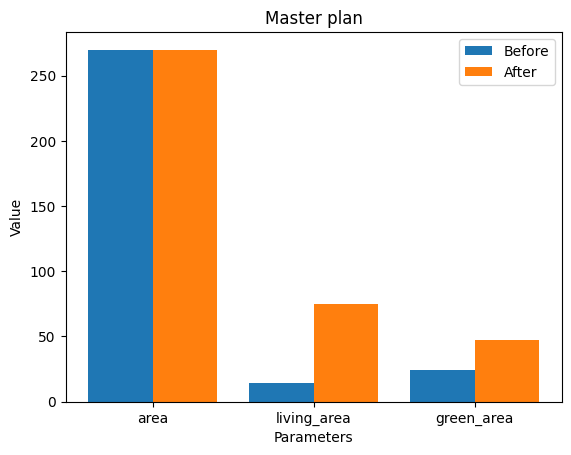

In [81]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = list(before.keys())
Ybefore = list(before.values())
Yafter = []
for key in X:
  Yafter.append(after[key])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ybefore, 0.4, label = 'Before')
plt.bar(X_axis + 0.2, Yafter, 0.4, label = 'After')
  
plt.xticks(X_axis, X)
plt.xlabel("Parameters")
plt.ylabel("Value")
plt.title("Master plan")
plt.legend()
plt.show()